In [118]:

# Install kaggle and dataset, extract data
"""%matplotlib inline
%pip install kaggle
%pip install pydot
!brew install graphviz
!/Users/jon/Library/Python/3.9/bin/kaggle competitions download -c sf-crime
import shutil
shutil.unpack_archive("sf-crime.zip", "sf-crime")
shutil.unpack_archive("sf-crime/train.csv.zip", "sf-crime/train")
shutil.unpack_archive("sf-crime/test.csv.zip", "sf-crime/test")
shutil.unpack_archive("sf-crime/sampleSubmission.csv.zip", "sf-crime/sampleSubmission")
"""

'%matplotlib inline\n%pip install kaggle\n%pip install pydot\n!brew install graphviz\n!/Users/jon/Library/Python/3.9/bin/kaggle competitions download -c sf-crime\nimport shutil\nshutil.unpack_archive("sf-crime.zip", "sf-crime")\nshutil.unpack_archive("sf-crime/train.csv.zip", "sf-crime/train")\nshutil.unpack_archive("sf-crime/test.csv.zip", "sf-crime/test")\nshutil.unpack_archive("sf-crime/sampleSubmission.csv.zip", "sf-crime/sampleSubmission")\n'

In [130]:
# load csv data from train.csv
import pandas as pd
train = pd.read_csv("sf-crime/train/train.csv")
train.sample(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
554641,2007-07-14 08:12:00,WARRANTS,WARRANT ARREST,Saturday,MISSION,"ARREST, BOOKED",500 Block of SOUTH VAN NESS AV,-122.417477,37.764358
347125,2010-07-18 17:45:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,SOUTHERN,"ARREST, CITED",800 Block of BRYANT ST,-122.403405,37.775421
293263,2011-05-06 17:05:00,ROBBERY,"ROBBERY, BODILY FORCE",Friday,CENTRAL,NONE,500 Block of GEARY ST,-122.412777,37.786834
495238,2008-05-26 03:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,900 Block of FOLSOM ST,-122.405094,37.778994
524624,2007-12-14 20:07:00,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Friday,TENDERLOIN,NONE,100 Block of EDDY ST,-122.410135,37.784189


In [147]:
# load csv data from test.csv
test_useless = pd.read_csv("sf-crime/test/test.csv")
test_useless.sample(5)
test_useless["Address"].sample(10)

87664           17TH ST / CLAYTON ST
387703        HAIGHT ST / ASHBURY ST
881563        WALLER ST / SHRADER ST
869582         HARRISON ST / 10TH ST
667772         CASTRO ST / MARKET ST
512935         1800 Block of TURK ST
859848    MCALLISTER ST / STEINER ST
802871       1800 Block of WALLER ST
221868       1400 Block of REVERE AV
419533           100 Block of 6TH ST
Name: Address, dtype: object

In [133]:
def string_to_int(string):
    return sum([ord(c) for c in string])

# a function that takes an array of unique values and returns a dictionary with values as keys and indices as values
def get_dict(array):
    return {array[i]: i+1 for i in range(len(array))}

def min_max_normalize(array, min=None, max=None):
    if min is None: min = array.min()
    if max is None: max = array.max()
    return (array - min) / (max - min)

train_mod = train.copy()
# convert the column dates to unix timestamp, ex: 2015-05-13 23:53:00 to 1431525380
train_mod["Dates"] = pd.to_datetime(train["Dates"]).view(int) / 10**9
train_mod["Dates"] = min_max_normalize(train_mod["Dates"].astype(int), 0, 2_147_483_647)
# map day of the week to a number
print("amount of unique day of the week " + str(len(train["DayOfWeek"].unique())))
train_mod["DayOfWeek"] = train["DayOfWeek"].map(get_dict(train["DayOfWeek"].unique()))
train_mod["DayOfWeek"] = min_max_normalize(train_mod["DayOfWeek"])
# map the address to a number
print("amount of unique addresses " + str(len(train["Address"].unique())))
train_mod["Address"] = train["Address"].apply(string_to_int)
train_mod["Address"] = min_max_normalize(train_mod["Address"], 0, train_mod["Address"].max())
# map the pd district to a number
print("amount of unique pd districts " + str(len(train["PdDistrict"].unique())))
train_mod["PdDistrict"] = train["PdDistrict"].map(get_dict(train["PdDistrict"].unique()))
train_mod["PdDistrict"] = min_max_normalize(train_mod["PdDistrict"])
# map the category to a number
print("amount of unique categories " + str(len(train["Category"].unique())))
train_mod["Category"] = train["Category"].map(get_dict(train["Category"].unique()))
train_mod["Category"] = min_max_normalize(train_mod["Category"])
# map the resolution to a number
print("amount of unique resolutions " + str(len(train["Resolution"].unique())))
train_mod["Resolution"] = train["Resolution"].map(get_dict(train["Resolution"].unique()))
train_mod["Resolution"] = min_max_normalize(train_mod["Resolution"])
# map descript to a number
print("amount of unique descriptions " + str(len(train["Descript"].unique())))
train_mod["Descript"] = train["Descript"].map(get_dict(train["Descript"].unique()))
train_mod["Descript"] = min_max_normalize(train_mod["Descript"])
# map the coordinates to a number by using min max normalization
train_mod["X"] = min_max_normalize(train["X"], -180, 180)
train_mod["Y"] = min_max_normalize(train["Y"], -90, 90)

# drop the category column
train_mod.drop(columns=["Category"], inplace=True)
train_mod.drop(columns=["Descript"], inplace=True)
train_mod.drop(columns=["Resolution"], inplace=True)
train_mod

amount of unique day of the week 7
amount of unique addresses 23228
amount of unique pd districts 10
amount of unique categories 39
amount of unique resolutions 17
amount of unique descriptions 879


,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0.666623,0.000000,0.000000,0.399043,0.159928,0.709859
1,0.666623,0.000000,0.000000,0.399043,0.159928,0.709859
2,0.666622,0.000000,0.000000,0.581824,0.159932,0.710002
3,0.666622,0.000000,0.000000,0.584216,0.159925,0.710005
4,0.666622,0.000000,0.111111,0.616672,0.159892,0.709842
...,...,...,...,...,...,...
878044,0.485132,0.333333,0.666667,0.601298,0.159836,0.709523
878045,0.485131,0.333333,0.222222,0.488213,0.159868,0.709622
878046,0.485131,0.333333,1.000000,0.403826,0.159991,0.709890
878047,0.485131,0.333333,1.000000,0.454732,0.160026,0.709892


In [134]:
# here we import everything you need to build the CNN
import keras
import numpy as np
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import UpSampling2D, Input, BatchNormalization, Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, RandomFlip, RandomRotation, RandomZoom
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
import tensorflow as tf
import keras

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


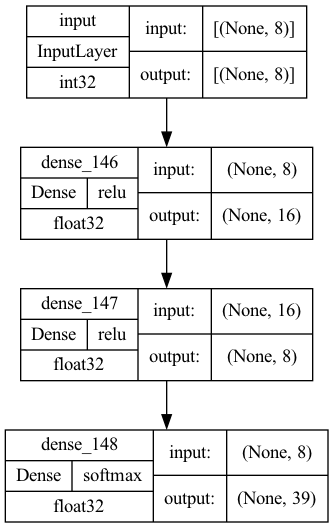

In [123]:
def plot_learning_curves(history):
    n = len(history.history['loss'])
    plt.plot(np.arange(1, n+1), history.history['loss'], label="training loss")
    plt.plot(np.arange(1, n+1), history.history['val_loss'], label="validation loss")
    plt.legend()
    plt.grid()
    plt.xticks(np.arange(1, n+1, 2))


def DenseReluBatchNorm(units: int, activation: str = "relu", use_bias: bool = True):
    return keras.Sequential(
        [
            Dense(units, use_bias=use_bias),
            Activation(activation),
            BatchNormalization(),
        ]
    )

model = Sequential()
# -1 because we don't want to include the category column
model.add(Input(shape=(train_mod.shape[1] - 1,), dtype='int32', name='input'))

model.add(Dense(16, activation='relu'))
BatchNormalization()
model.add(Dense(8, activation='relu'))


#model.add(Dropout(0.5))

model.add(Dense(units=len(train["Category"].unique()), activation='softmax'))  # we need to classify the category of the crime

tf.keras.utils.plot_model(model, to_file="/tmp/model.png", show_layer_activations=True, show_shapes=True, show_dtype=True, show_layer_names=True)


In [124]:
model.summary()

Model: "sequential_108"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_146 (Dense)           (None, 16)                144       
                                                                 
 dense_147 (Dense)           (None, 8)                 136       
                                                                 
 dense_148 (Dense)           (None, 39)                351       
                                                                 
Total params: 631
Trainable params: 631
Non-trainable params: 0
_________________________________________________________________


In [125]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

early_stopping = EarlyStopping(
    monitor="val_loss",
    mode="min",
    patience=1,
)

x_train = train_mod.drop(["Category"], axis=1)
# convert the category column to a one hot encoded array
y_train = keras.utils.to_categorical(train_mod["Category"], num_classes=len(train["Category"].unique()))


history = model.fit(
  x_train,
  y_train,
  epochs=1,
  batch_size=32,
  validation_split=.1,
  callbacks=[early_stopping],
)

    6/24696 [..............................] - ETA: 4:30 - loss: 3.6599 - accuracy: 0.6667   

2022-12-06 13:41:30.399378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


24695/24696 [============================>.] - ETA: 0s - loss: 0.0262 - accuracy: 0.9997

2022-12-06 13:45:45.042361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


24696/24696 [==============================] - 276s 11ms/step - loss: 0.0262 - accuracy: 0.9997 - val_loss: 1.3815e-04 - val_accuracy: 1.0000


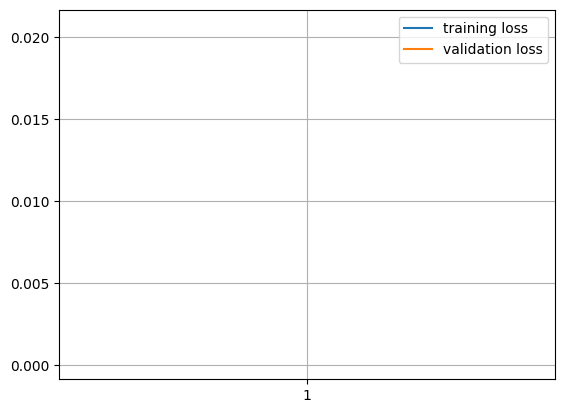

In [111]:
plot_learning_curves(history)

In [116]:
from sklearn.metrics import classification_report


predicted_class_probabilities = model.predict(test.drop(["Category"], axis=1))
predicted_labels = np.argmax(predicted_class_probabilities, axis=1)


y_test = np.argmax(keras.utils.to_categorical(test["Category"], num_classes=len(train["Category"].unique())), axis=1)


class_names = train["Category"].unique()

print(classification_report(y_true=y_test, y_pred=predicted_labels, target_names=class_names))

['WARRANTS' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VANDALISM'
 'NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'WEAPON LAWS' 'BURGLARY'
 'SUSPICIOUS OCC' 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC'
 'STOLEN PROPERTY' 'SECONDARY CODES' 'TRESPASS' 'MISSING PERSON' 'FRAUD'
 'KIDNAPPING' 'RUNAWAY' 'DRIVING UNDER THE INFLUENCE'
 'SEX OFFENSES FORCIBLE' 'PROSTITUTION' 'DISORDERLY CONDUCT' 'ARSON'
 'FAMILY OFFENSES' 'LIQUOR LAWS' 'BRIBERY' 'EMBEZZLEMENT' 'SUICIDE'
 'LOITERING' 'SEX OFFENSES NON FORCIBLE' 'EXTORTION' 'GAMBLING'
 'BAD CHECKS' 'TREA' 'RECOVERED VEHICLE' 'PORNOGRAPHY/OBSCENE MAT']


KeyError: "['Category'] not found in axis"